In [2]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 20.340334 seconds (30.83 k allocations: 10.393 GiB, 0.12% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:501,:]
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:501,:]

500×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [123]:
Pos_rg_mean = Array{Float64,1}()
Pos_cov_mean = Array{Float64,1}()
for i= 1:435
# Get genotypes for 1000 SNP
M_i= M[:, 2+1000*(i-1):2+1000*i-1]

# Get marker effects for 2000 SNP
Effect_ADG_i= SNP_Effect_ADG[:, 2+1000*(i-1):2+1000*i-1]
BV_ADG_i= Effect_ADG_i * M_i'
# Get var for each iteration
var_ADGi= vec(var(BV_ADG_i, dims=2)) 

# Get marker effects for 2000 SNP
Effect_AllTRT_i= SNP_Effect_AllTRT[:, 2+1000*(i-1):2+1000*i-1]
BV_AllTRT_i= Effect_AllTRT_i * M_i'

# Get var for each iteration
var_AllTRTi= vec(var(BV_AllTRT_i, dims=2)) 

coVari = Array{Float64,1}()
for n=1:500
    adg= BV_ADG_i[n,:]
    AllTRT= BV_AllTRT_i[n,:]
    covi=cov(adg, AllTRT)
    push!(coVari,covi)
end

outi=DataFrame(covar=coVari)
insertcols!(outi, 1, :var_ADG => var_ADGi)
insertcols!(outi, 1, :var_AllTRT => var_AllTRTi)
insertcols!(outi, 1, :iteration => 1:500) # Add a column called iteration
# genetic correlation
Product= outi[!,:var_AllTRT] .* outi[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= outi[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(outi, 2, :corr => rg)

# Get mean of rg and push into a vector
corr= vec(replace(outi[!,:corr], NaN=>missing)) 
rg_mean = mean(skipmissing(corr))
push!(Pos_rg_mean, rg_mean)
    
# Get mean of covar and push into a vector
cov_mean = mean(outi[!,:covar])
push!(Pos_cov_mean, cov_mean)

end
Pos_cov_mean

435-element Array{Float64,1}:
 -2.9001986617491544e-6
  2.9320656720847578e-6
 -3.158826906189464e-8 
  1.41167158243632e-6  
  1.2857432412915471e-6
 -6.23375887126524e-6  
  3.2251198507388917e-7
  1.5951397867998354e-5
 -2.9269293629913456e-6
  5.631630124585104e-6 
  1.2264464658145829e-5
  2.4822807402259943e-6
 -6.747211456194351e-6 
  ⋮                    
  1.5406884616920747e-6
 -2.922765966465933e-6 
 -8.10488148720851e-6  
  1.6817284859282581e-6
 -2.284127600596114e-6 
 -3.252816346287833e-6 
 -2.550794352428202e-6 
 -4.186165929970629e-6 
 -1.9977653777505803e-6
  5.083212533952979e-6 
  4.613615321587456e-6 
 -9.29313423111657e-8  

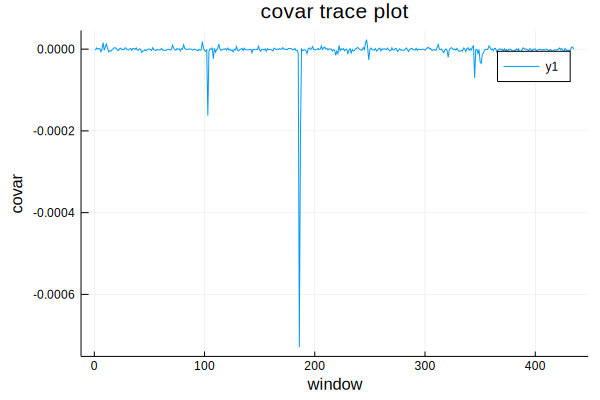

In [128]:
covar=DataFrame(covar=Pos_cov_mean)
insertcols!(covar, 1, :window => 1:435)

using Plots
x = covar[!,1]; y = covar[!,2]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "window", ylabel = "covar")

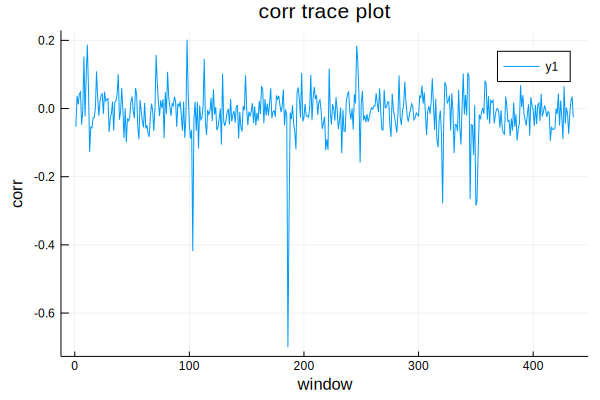

In [118]:
rg=DataFrame(rg=Pos_rg_mean)
insertcols!(rg, 1, :window => 1:435)

using Plots
x = rg[!,1]; y = rg[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "window", ylabel = "corr")

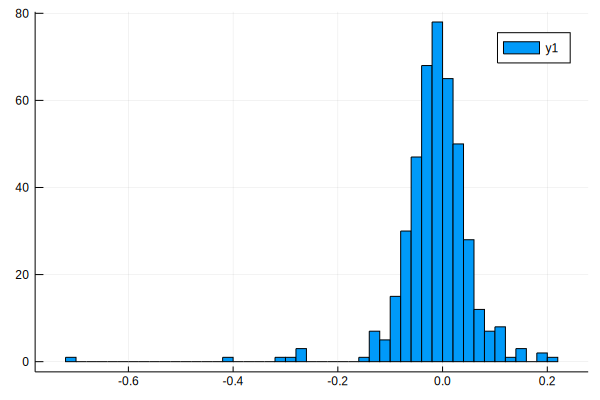

In [119]:
h = histogram(rg[!,2])
display(h)